In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#cls_data = ['compas', "income", "iris", "diabetes", 'breast_cancer',"nursery", "mushroom"]
cls_data =['breast_cancer', 'compas', 'diabetes', 'income', 'iris']
models = ["logit", 'decision_tree', "nb"]
perm_methods = ["permutation", "baseline_min", "baseline_mean", "baseline_max", "baseline_0"]

for data in cls_data:
    df = pd.DataFrame()
    for model in models:
        model_df = pd.DataFrame()
        for method in perm_methods:
            csv = pd.read_csv(os.path.join(data, model, method+"_results.csv"), sep=";")
            csv["Method"] = method
            model_df = pd.concat([model_df, csv], axis=0, ignore_index=False, join="outer")
        model_df["Model"] = model
        df = pd.concat([model_df, df], axis=0, ignore_index=False, join="outer")
    #print(df.shape)
    
    #df = df.sort_values("Method", ascending=False)
    print(df.groupby(["Method", "Model"]).agg({'MAPE Correctness': ["mean", "std"]}).round(4))
    print(df.groupby(["Method", "Model"]).agg({'RMSE Correctness': ["mean", "std"]}).round(4))
    print(df.groupby(["Method", "Model"]).agg({'R2 Correctness': ["mean", "std"]}).round(4))

    

    print("-----------------%s-----------------" %(data))
# #     for method in perm_methods:
#     #rint(method)
#     fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#     sns.boxplot(data=df, hue="Model", y="MAPE Correctness", x="Method", ax=ax[0])
#     ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 50)
#     ax[0].get_legend().remove()
#     ax[0].set_ylim(-1.05, 1.05)
    
#     sns.boxplot(data=df, hue="Model", y="RMSE Correctness", x="Method", ax=ax[1])
#     ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 50)
#     ax[1].get_legend().remove()
#     ax[1].set_ylim(-1.05, 1.05)

#     sns.boxplot(data=df, hue="Model", y="R2 Correctness", x="Method", ax=ax[2])
#     ax[2].set_ylim(-1.05, 1.05)
#     ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 50)
#     ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1))
#     fig.tight_layout()
#     plt.show()

                            MAPE Correctness        
                                        mean     std
Method        Model                                 
baseline_0    decision_tree           0.7118  0.1613
              logit                   0.5010  0.1255
              nb                      0.0983  0.2752
baseline_max  decision_tree           0.7044  0.1072
              logit                   0.5416  0.1959
              nb                      0.3662  0.2686
baseline_mean decision_tree           0.6276  0.1181
              logit                   0.5299  0.1058
              nb                      0.7206  0.1370
baseline_min  decision_tree           0.7118  0.1613
              logit                   0.5020  0.1226
              nb                      0.1117  0.2679
permutation   decision_tree           0.7923  0.1296
              logit                   0.6548  0.0818
              nb                      0.4514  0.1889
                            RMSE Correctness  

-----------------compas-----------------


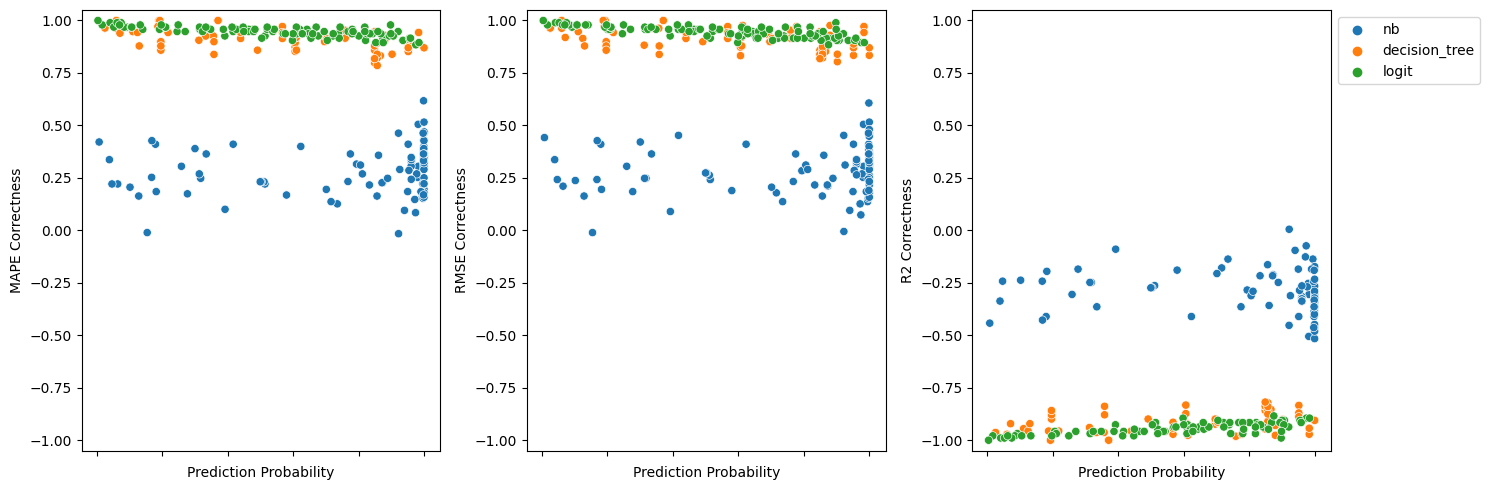

-----------------income-----------------


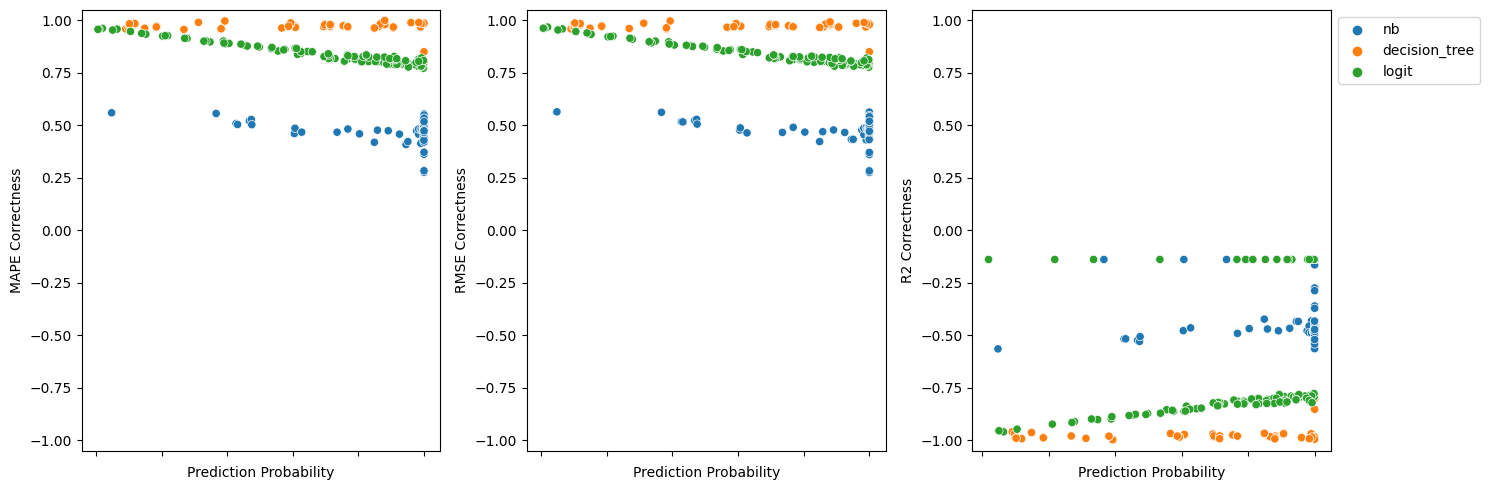

-----------------iris-----------------


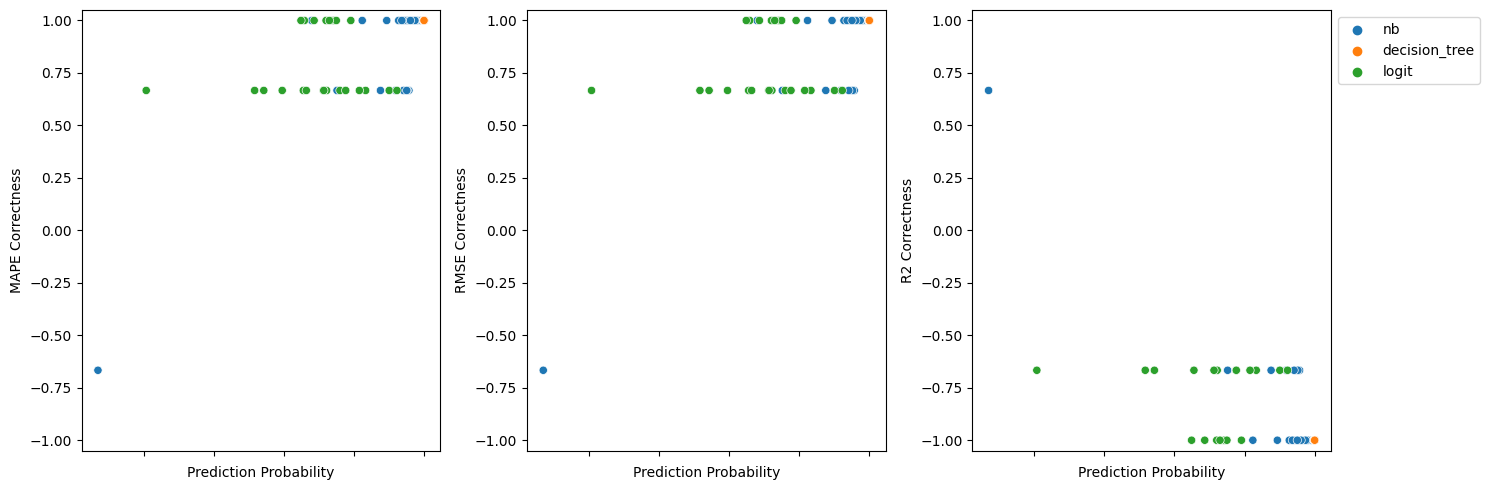

-----------------diabetes-----------------


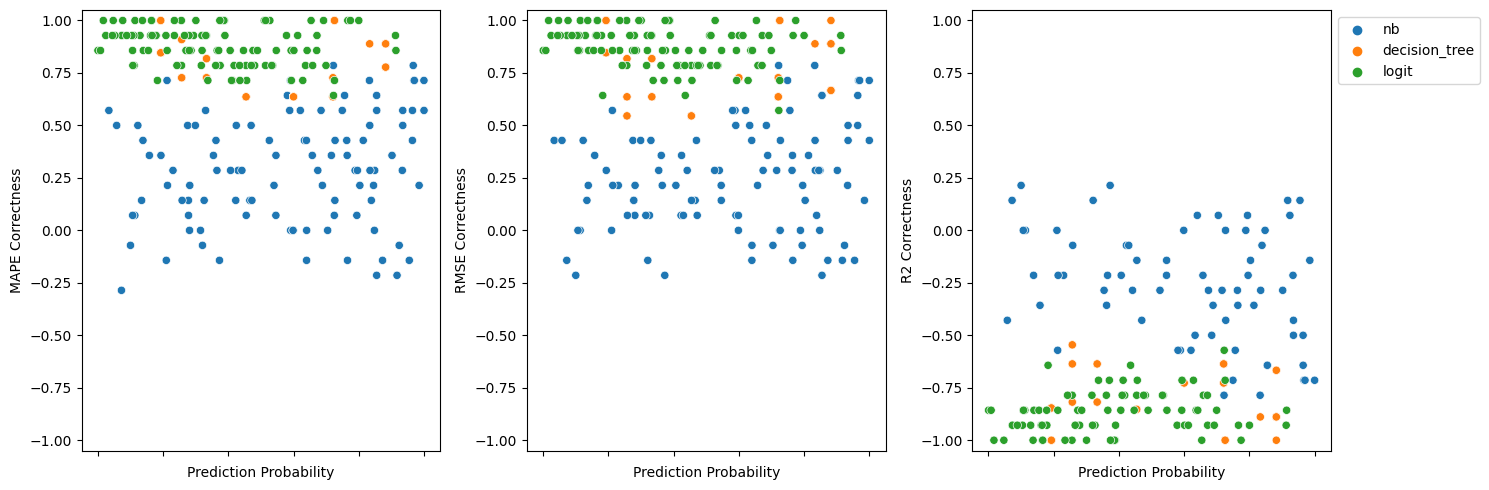

-----------------breast_cancer-----------------


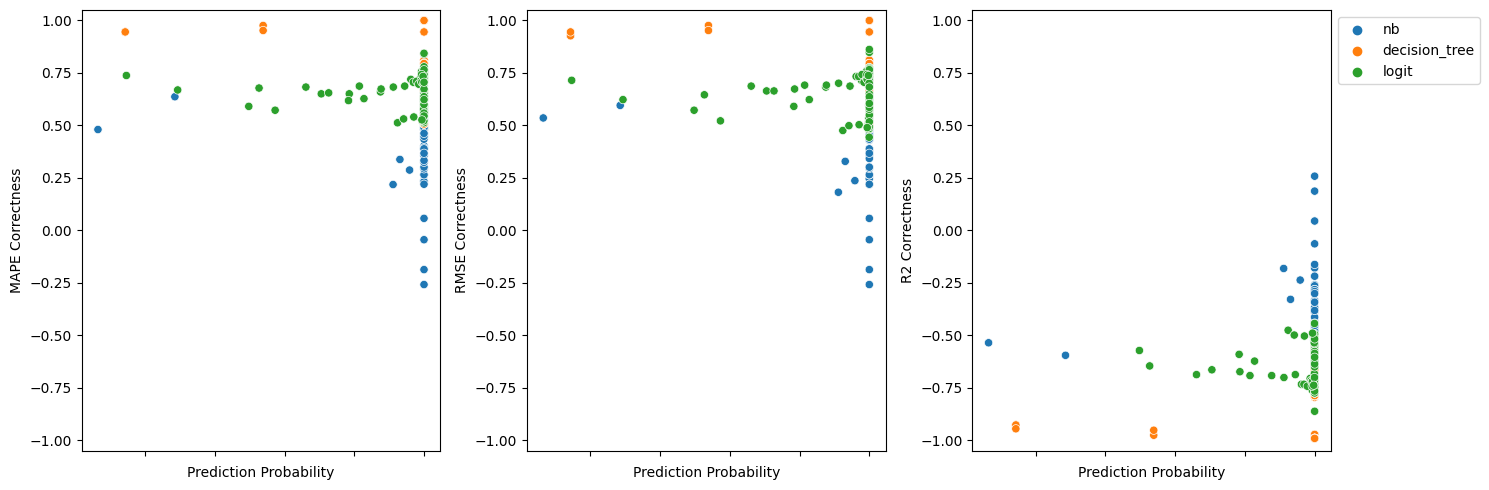

FileNotFoundError: [Errno 2] No such file or directory: 'nursery\\logit\\permutation_results.csv'

In [3]:
cls_data = ['compas', "income", "iris", "diabetes", 'breast_cancer',"nursery", "mushroom"]
models = ["logit", 'decision_tree', "nb"]
perm_methods = ["permutation", "baseline_min", "baseline_mean", "baseline_max", "baseline_0"]

for data in cls_data:
    df = pd.DataFrame()
    for model in models:
        model_df = pd.DataFrame()
        for method in perm_methods:
            csv = pd.read_csv(os.path.join(data, model, method+"_results.csv"), sep=";")
            csv["Method"] = method
            model_df = pd.concat([model_df, csv], axis=0, ignore_index=False, join="outer")
        model_df["Model"] = model
        df = pd.concat([model_df, df], axis=0, ignore_index=False, join="outer")
    #print(df.shape)
    
    #df = df.sort_values("Method", ascending=False)
#     print(df.groupby(["Method", "Model"]).agg({'MAPE Correctness': ["mean", "std"]}).round(4))
#     print(df.groupby(["Method", "Model"]).agg({'RMSE Correctness': ["mean", "std"]}).round(4))
#     print(df.groupby(["Method", "Model"]).agg({'R2 Correctness': ["mean", "std"]}).round(4))

    

    print("-----------------%s-----------------" %(data))
# #     for method in perm_methods:
#     #rint(method)
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    sns.scatterplot(data=df[df["Method"]=="permutation"], hue="Model", y="MAPE Correctness", x="Prediction Probability", ax=ax[0])
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 50)
    ax[0].get_legend().remove()
    ax[0].set_ylim(-1.05, 1.05)
    
    sns.scatterplot(data=df[df["Method"]=="permutation"], hue="Model", y="RMSE Correctness", x="Prediction Probability", ax=ax[1])
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 50)
    ax[1].get_legend().remove()
    ax[1].set_ylim(-1.05, 1.05)

    sns.scatterplot(data=df[df["Method"]=="permutation"], hue="Model", y="R2 Correctness", x="Prediction Probability", ax=ax[2])
    ax[2].set_ylim(-1.05, 1.05)
    ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 50)
    ax[2].legend(loc='upper left', bbox_to_anchor=(1, 1))
    fig.tight_layout()
    plt.show()

In [ ]:
df

In [ ]:
reg_data = ['real_estate', 'solar_flare']
models = ['decision_tree', "lin_reg"]
perm_methods = ["permutation", "baseline_min", "baseline", "baseline_max"]

for data in reg_data:
    df = pd.DataFrame()
    for model in models:
        model_df = pd.DataFrame()
        for method in perm_methods:
            csv = pd.read_csv(os.path.join(data, model, method+"_results.csv"), sep=";")
            csv["Method"] = method
            model_df = pd.concat([model_df, csv], axis=0, ignore_index=False, join="outer")
        model_df["Model"] = model
        df = pd.concat([model_df, df], axis=0, ignore_index=False, join="outer")
    #print(df.shape)
    
    print(df.groupby(["Method", "Model"])["MAPE Correctness"].mean())
    
    print("-----------------%s-----------------" %(data))
    for method in perm_methods:
        print(method)
        sns.boxplot(data=df[df["Method"] == method], x="Model", y="MAPE Correctness")
        plt.show()

In [ ]:
df.Model.unique()

In [ ]:
models = ["decision_tree", "logit", "lin_reg", "nb"]
model_names = ["Decision Tree", "Logistic Regression", "Linear Regression", "Naive Bayes"]
model_dict = dict(list(zip(models, model_names)))
sns.set_theme(style="whitegrid")

In [ ]:
def f1_calc(prec, rec):
    if prec == 0 and rec == 0:
        return 0
    f1 = 2*(prec*rec)/(prec+rec)
    return f1

In [ ]:
dataset = "iris"
cls_method = ["decision_tree", "logit", "nb"]
xai_methods = ["LIME", "SHAP", "LINDA", "ACV"]

corrs = []
mn = []

for model in cls_method:
    print(model_dict[model])
    results_path = os.path.join(dataset, model, "results.csv")
    res = pd.read_csv(results_path, sep=";")
    
    corrs.extend(res["MAPE Correctness"].astype(float))
    mn.extend([model]*len(res["MAPE Correctness"]))
    
    for xai in xai_methods:
        print(xai)
        common_cols = ["Actual", "Prediction", "Prediction Probability"]
        xai_cols = [xai+" Precision", xai+" Recall", xai+" KT-B"]
        all_cols = common_cols+xai_cols
        
        xai_res = res[all_cols]
        
        print(np.mean(xai_res[xai_cols]))
        
        xai_res[xai+" F1"] = xai_res.apply(lambda x: f1_calc(x[xai+" Precision"], x[xai+" Recall"]), axis=1)
                
        sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-B", label="F1-Score")
        sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-B", label="Precision")
        sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-B", label="Recall")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-B", label="KT-B")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-C", label="KT-C")
        plt.xlim(-0.01,1.01)
        plt.ylim(-1.01, 1.01)
        plt.xlabel("Phase 1 Result")
        plt.ylabel("Correlation")
        plt.legend(bbox_to_anchor=(1.02,1))
        plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Precision")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Recall")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
        print("\n")
        
    print("\n")

In [ ]:
corr_df = pd.DataFrame(np.array([corrs, mn]).transpose(), columns = ["Correlation", "Model"])#.fillna(0)
corr_df["Correlation"] = corr_df["Correlation"].astype(float)

sns.boxplot(data = corr_df, y="Correlation", x = "Model")
plt.ylim(-1.01, 1.01)

corr_df.groupby("Model").describe()

In [ ]:
dataset = "diabetes"
cls_method = ["decision_tree", "logit", "nb"]
xai_methods = ["LIME", "SHAP", "LINDA", "ACV"]

corrs = []
mn = []
for model in cls_method:
    print(model_dict[model])
    results_path = os.path.join(dataset, model, "results.csv")
    res = pd.read_csv(results_path, sep=";")

    corrs.extend(res["MAPE Correctness"].astype(float))
    mn.extend([model]*len(res["MAPE Correctness"]))
    
    for xai in xai_methods:
        print(xai)
        common_cols = ["Actual", "Prediction", "Prediction Probability"]
        xai_cols = [xai+" Precision", xai+" Recall", xai+" KT-B"]
        all_cols = common_cols+xai_cols
        
        xai_res = res[all_cols]
        
        print(np.mean(xai_res[xai_cols]))
        
        xai_res[xai+" F1"] = xai_res.apply(lambda x: f1_calc(x[xai+" Precision"], x[xai+" Recall"]), axis=1)
                
        sns.scatterplot(data = xai_res, y = xai+" F1", x = xai+" KT-B", label="F1-Score")
        sns.scatterplot(data = xai_res, y = xai+" Precision", x = xai+" KT-B", label="Precision")
        sns.scatterplot(data = xai_res, y = xai+" Recall", x = xai+" KT-B", label="Recall")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-B", label="KT-B")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-C", label="KT-C")
        plt.ylim(-0.01,1.01)
        plt.xlim(-1.01, 1.01)
        plt.ylabel("Phase 1 Result")
        plt.xlabel("Phase 2 Result")
        plt.legend(bbox_to_anchor=(1.02,1))
        plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Precision")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Recall")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
        print("\n")
        
    print("\n")

In [ ]:
corr_df = pd.DataFrame(np.array([corrs, mn]).transpose(), columns = ["Correlation", "Model"])#.fillna(0)
corr_df["Correlation"] = corr_df["Correlation"].astype(float)

sns.boxplot(data = corr_df, y="Correlation", x = "Model")
plt.ylim(-1.01, 1.01)

corr_df.groupby("Model").describe()

In [ ]:
dataset = "real_estate"
cls_method = ["decision_tree", "lin_reg"]
xai_methods = ["LIME", "SHAP", "ACV"]

corrs = []
mn = []

for model in cls_method:
    print(model_dict[model])
    results_path = os.path.join(dataset, model, "results.csv")
    res = pd.read_csv(results_path, sep=";")
    
    corrs.extend(res["MAPE Correctness"].astype(float))
    mn.extend([model]*len(res["MAPE Correctness"]))
    
    for xai in xai_methods:
        print(xai)
        common_cols = ["Actual", "Prediction"]
        xai_cols = [xai+" Precision", xai+" Recall", xai+" KT-B"]
        all_cols = common_cols+xai_cols
        
        xai_res = res[all_cols]

        print(np.mean(xai_res[xai_cols]))
        
        xai_res[xai+" F1"] = xai_res.apply(lambda x: f1_calc(x[xai+" Precision"], x[xai+" Recall"]), axis=1)
                
        sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-B", label="F1-Score")
        sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-B", label="Precision")
        sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-B", label="Recall")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-B", label="KT-B")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-C", label="KT-C")
        plt.xlim(-0.01,1.01)
        plt.ylim(-1.01, 1.01)
        plt.xlabel("Phase 1 Result")
        plt.ylabel("Correlation")
        plt.legend(bbox_to_anchor=(1.02,1))
        plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Precision")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Recall")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
        print("\n")
        
    print("\n")

In [ ]:
corr_df = pd.DataFrame(np.array([corrs, mn]).transpose(), columns = ["Correlation", "Model"])#.fillna(0)
corr_df["Correlation"] = corr_df["Correlation"].astype(float)

sns.boxplot(data = corr_df, y="Correlation", x = "Model")
plt.ylim(-1.01, 1.01)

corr_df.groupby("Model").describe()

In [ ]:
dataset = "solar_flare"
cls_method = ["decision_tree", "lin_reg"]
xai_methods = ["LIME", "SHAP", "ACV"]

corrs = []
mn = []

for model in cls_method:
    print(model_dict[model])
    results_path = os.path.join(dataset, model, "results.csv")
    res = pd.read_csv(results_path, sep=";")
    
    corrs.extend(res["MAPE Correctness"].astype(float))
    mn.extend([model]*len(res["MAPE Correctness"]))

    for xai in xai_methods:
        print(xai)
        common_cols = ["Actual", "Prediction"]
        xai_cols = [xai+" Precision", xai+" Recall", xai+" KT-B"]
        all_cols = common_cols+xai_cols
        
        xai_res = res[all_cols]
        
        print(np.mean(xai_res[xai_cols]))
        
        xai_res[xai+" F1"] = xai_res.apply(lambda x: f1_calc(x[xai+" Precision"], x[xai+" Recall"]), axis=1)
                
        sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-B", label="F1-Score")
        sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-B", label="Precision")
        sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-B", label="Recall")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-B", label="KT-B")
 #       sns.scatterplot(data = xai_res, x = xai+" F1", y = xai+" KT-C", label="KT-C")
        plt.xlim(-0.01,1.01)
        plt.ylim(-1.01, 1.01)
        plt.xlabel("Phase 1 Result")
        plt.ylabel("Correlation")
        plt.legend(bbox_to_anchor=(1.02,1))
        plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Precision", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Precision")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" SRCC", label="SRCC")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-B", label="KT-B")
#         sns.scatterplot(data = xai_res, x = xai+" Recall", y = xai+" KT-C", label="KT-C")
#         plt.xlim(-0.01,1.01)
#         plt.ylim(-1.01, 1.01)
#         plt.xlabel("Recall")
#         plt.ylabel("Correlation")
#         plt.legend(bbox_to_anchor=(1.02,1))
#         plt.show()
        
        print("\n")
        
    print("\n")

In [ ]:
corr_df = pd.DataFrame(np.array([corrs, mn]).transpose(), columns = ["Correlation", "Model"])#.fillna(0)
corr_df["Correlation"] = corr_df["Correlation"].astype(float)

sns.boxplot(data = corr_df, y="Correlation", x = "Model")
plt.ylim(-1.01, 1.01)

corr_df.groupby("Model").describe()